In [184]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
# from scipy.optimize import curve_fit
# from scipy.optimize import minimize
from random import *


%matplotlib inline

In [185]:
'''
gloabl parameters

@param N: number of sites
@param T: temperature
@param ts: number of time steps
'''


'\ngloabl parameters\n\n@param N: number of sites\n@param T: temperature\n@param ts: number of time steps\n'

In [186]:
def init(N):
    '''initialize lattice with random spins. No external field'''   
    lattice = np.zeros([N,N]) # creates N x N matrix 
    for i in range(N):
        for j in range (N):
            random_prob = random() # start out with random probability for each site
            if random_prob > 0.5:
                lattice[i][j]=1 # spin up
            elif random_prob < 0.5:
                lattice[i][j] = -1 # spin down
    # impose periodic boudnary conditions
    lattice[:,N-1]= lattice[:,0] # last_col = first_col
    lattice[N-1,:]= lattice [0,:] # last_raw =first_raw
    return lattice
                

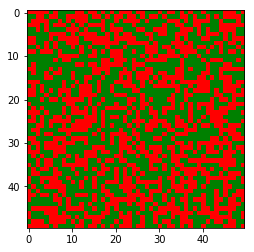

In [187]:
''' plot initial lattice with 2d color map '''
# Ref: https://stackoverflow.com/questions/7229971/2d-grid-data-visualization-in-python


N=50
T=3
lattice=init(N)

cmap = mpl.colors.ListedColormap(['green', 'red']) # spin up= green; spin down = red 
bounds = [-N, -N, N, N]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

img = plt.imshow(lattice, interpolation='none', cmap = cmap)
plt.show()


In [188]:
def fixed(N):
    '''initialize lattice with all spin up. No external field''' 
    lattice = np.zeros([N,N])
    for i in range(N):
        for j in range(N):
            lattice[i][j]=1
    # impose periodic boudnary conditions
    lattice[:,N-1]= lattice[:,0] # last_col = first_col
    lattice[N-1,:]= lattice [0,:] # last_raw =first_raw
    return lattice       
    

In [189]:
def metropolis(N, lattice, T):
    '''
    Move with Monte Carlo Metropolis algorithmn:
    - Choose a random atom, and flip its spin. 
    - If energy cost of spin flipping <0, flip.
    - If energy cost >0, flip with Boltzmann probability.
    - Else, stay in old configuration.
    ''' 
    for i in range (N):
        for j in range (N):
        # picks a random site [i,j]
            i= randint(0,N-1)
            j= randint(0,N-1)

            # defines neighboring points
            if i==0: # top row [0,j]
                top_neighbor= lattice[N-1, j] # wrap edges, sets bottom row to be upper neighbor of the top-most row
            else:
                top_neighbor= lattice[i-1][j]
            if i==N-1: # bottom row [N-1, j]
                bottom_neighbor= lattice[0, j] # sets top row to be lower neighbor of the bottom row
            else:
                bottom_neighbor= lattice[i+1][j]
            if j ==0: # first coloum [i,0]
                left_neighbor= lattice[i, N-1] # sets last coln to be left neighbor of the first coln
            else:
                left_neighbor= lattice[i, j-1]
            if j==N-1: # last coln [i,N-1]
                 right_neighbor= lattice[i, 0] # sets first coln to be right neighbor of last coln
            else:
                right_neighbor= lattice[i][j+1]
            # computes energy change inccured from flipping the spin of this site
            energy_cost= 2* lattice[i][j]* (top_neighbor+ bottom_neighbor + left_neighbor + right_neighbor)

        # accepts or rejects spin flip
    #     if energy_cost <= 0:
    #         lattice[i][j]= -lattice[i][j]
    #     el
            if random() < np.exp(-energy_cost/T): # accepts with Boltzmann probability
                lattice[i][j]= -lattice[i][j]
        # else, remain the same.
    return lattice


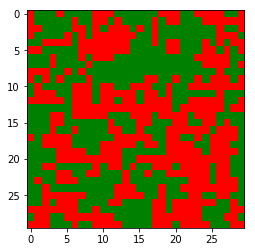

In [191]:
''' iterate Metropolis many times '''

N= 30
T= 4
lattice = init(N)

itera=3500

for i in range (itera):
    lattice = metropolis(N,lattice, T)

cmap = mpl.colors.ListedColormap(['green', 'red']) # spin up= green; spin down = red 
bounds = [-N, -N, N, N]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
img = plt.imshow(lattice, interpolation='none', cmap = cmap)

plt.show()   


### Mean internal energy $U= \frac{\langle E \rangle}{N}$

### Magnetization $M = \frac{\langle S \rangle}{N}$

### Magnetic susceptibility $\chi_T =\frac{\langle S^2 \rangle - {\langle S \rangle}^2 }{NT}$

### Speficifc heat $C_{H}= \frac{\langle E^2 \rangle - {\langle E\rangle}^2 }{NT^2}$

In [192]:
''' define how to compute ensemble quantities: internal energy, magnetization, specific heat, and magnetic susceptibility.'''

def internal_energy(N, lattice):
    '''
    Energy of system w/o external field: E= ΣS_i*S_j over all neighbor pairs.
    Total internal energy: <E>
    ''' 
    E = 0 
    for i in range (1, N):
        for j in range (1, N): 
            # defines neighboring points
            if i==0: # top row [0,j]
                top_neighbor= lattice[N-1, j] # wrap edges, sets bottom row to be upper neighbor of the top-most row
            else:
                top_neighbor= lattice[i-1][j]
            if i==N-1: # bottom row [N-1, j]
                bottom_neighbor= lattice[0, j] # sets top row to be lower neighbor of the bottom row
            else:
                bottom_neighbor= lattice[i+1][j]
            if j ==0: # first coloum [i,0]
                left_neighbor= lattice[i, N-1] # sets last coln to be left neighbor of the first coln
            else:
                left_neighbor= lattice[i, j-1]
            if j==N-1: # last coln [i,N-1]
                 right_neighbor= lattice[i, 0] # sets first coln to be right neighbor of last coln
            else:
                right_neighbor= lattice[i][j+1]
                
            neighbors= top_neighbor+ bottom_neighbor + right_neighbor +left_neighbor
            # computes coupling energy between each pair
            E += -lattice[i][j] * neighbors
    return E

def magnet(lattice):
    ''' Magnetization: <S> '''
    return np.sum(lattice)   # sums all elements in this 2d array


In [193]:
print(internal_energy(N, lattice))
print(magnet(lattice))

-980.0
-10.0


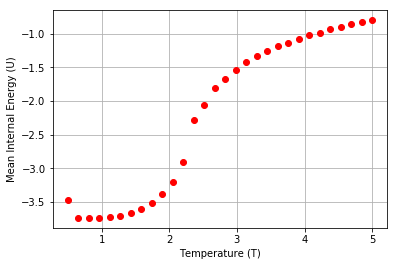

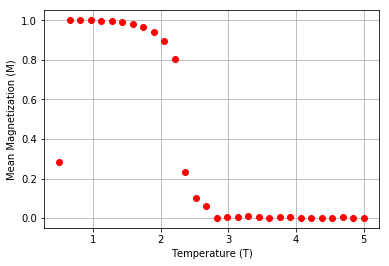

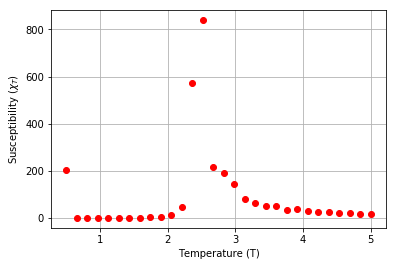

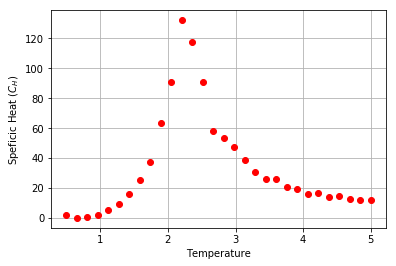

In [231]:
N=30
sampling_iter = 1000 # number of iterations used to compute averges of quantities

tempteps = 30 # number of temperature sampling points
temp= np.linspace(5, 0.5, tempteps) # starts from high temp to low (REMEMBER not to include 0 otherwise we have division of 0 in boltzmann factor.)

# all the ensemble qualities we want to compute (the averages).
energy = []
mag = []
sus = []
specificheat = []

for t in temp:
    '''iterate through each temperature'''
    lattice =init(N) # initializes the lattice
    
    E = 0 # initializes energy
    S = 0 # initializes spin
    E_square = 0
    S_square = 0
    
    
    for i in range (2000): 
        '''iterate many times for system to reach equilibrium state'''
        metropolis(N,lattice, t) 

    for j in range (sampling_iter):
        '''iterate to compute averages of quantities'''
        metropolis (N,lattice,t)
        
        E += internal_energy(N, lattice)
        S += magnet(lattice)
        
        E_square += internal_energy(N, lattice)*internal_energy(N, lattice)
        S_square += magnet(lattice)*magnet(lattice)

    ''' 
    Mean internal energy: U= <E>/N^2
    Mean magnetization: M=<S>/N^2
    Susceptibility: X= (<S^2> - <S>^2)/NT
    Specific heat: X= (<E^2> - <E>^2)/NT^2
    '''
    energy.append(E/(sampling_iter*N**2)) # average of energy E/N^2
    mag.append( abs(S/(sampling_iter*N**2)) ) # average of spin S/N
    sus.append( ( S_square/sampling_iter - (S/sampling_iter)**2 )/(N*t) )
    specificheat.append( ( E_square/sampling_iter - (E/sampling_iter)**2 ) /(N*t**2) )

fig1=plt.figure()   
plt.plot(temp, energy,'ro')
plt.xlabel('Temperature (T)')
plt.ylabel('Mean Internal Energy (U)')
plt.grid()

fig2=plt.figure()   
plt.plot(temp, mag,'ro')
plt.xlabel('Temperature (T)')
plt.ylabel('Mean Magnetization (M)')
plt.grid()

fig3=plt.figure()    
plt.plot(temp, sus,'ro')
plt.xlabel('Temperature (T)')
plt.ylabel('Susceptibility ($\chi_T$)')
plt.grid()

fig4=plt.figure()  
plt.plot(temp, specificheat,'ro')
plt.xlabel('Temperature')
plt.ylabel('Speficic Heat ($C_H$)')
plt.grid()
plt.show()


Onsager $[1-\sinh^{-4}(2/T)]^{1/8}$ for $T<T_c$

In [208]:
def onsager(T):
    if T < 2.2692:
        return (1 - (np.sinh(2/T))**(-4))**(1/8)
    else:
        return 0


<function matplotlib.pyplot.show>

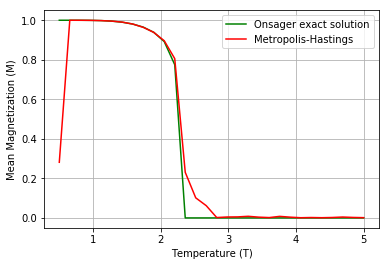

In [239]:
ons=[]
tempteps = 30 # number of temperature sampling points
temp= np.linspace(5, 0.5, tempteps) # starts from high temp to low (REMEMBER not to include 0 otherwise we have division of 0 in boltzmann factor.)

for t in temp:
    ons.append(onsager(t))
    
    
plt.plot(temp, ons, 'g-', label='Onsager exact solution')
plt.plot(temp, mag,'r-', label='Metropolis-Hastings')
plt.xlabel('Temperature (T)')
plt.ylabel('Mean Magnetization (M)')
plt.legend()
plt.grid()
plt.show

In [241]:
temp= np.linspace(0.5, 5, 30)

print(len(temp))

30


In [ ]:
# iterate 4000 times for it to equilibrate. Last 1000 times, compute averages of quantities